# Simple Neural Network Model

Input: single principal component based on all 15 indicators 

Output: optimal max-shape portfolio with tight restrictions for the next period

In [1]:
import os
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [2]:
data_provider = DataProvider()
x = data_provider.get_formatted_features()
y = data_provider.get_formatted_targets()
x_train, y_train, x_val, y_val, x_test, y_test = data_provider.train_train_split(x, y)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


## Simple Dense Neural Network Model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout, GRU, LSTM, Bidirectional
from keras.regularizers import L2

from helper_functions import train_and_evaluate_model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.8878 - val_loss: 2.6436 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5702 - val_loss: 2.3479 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2808 - val_loss: 2.0794 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0183 - val_loss: 1.8374 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7822 - val_loss: 1.6204 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5707 - val_loss: 1.4265 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3821 - val_loss: 1.2539 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2139 - val_loss: 1.1005 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0651 - val_loss: 0.9645 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

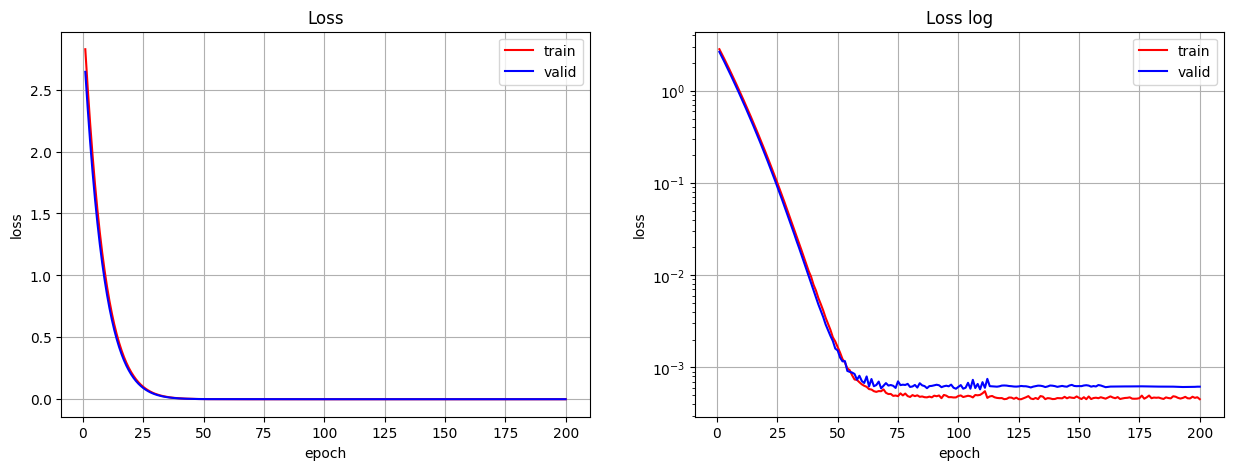

In [4]:
model_dnn = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn, x_train, y_train,
                         x_val, y_val, x_test, y_test)

In [5]:
predictions = model_dnn.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [6]:
predictions[0].round(3)

array([0.468, 0.079, 0.087, 0.031, 0.028, 0.032, 0.026, 0.023, 0.012,
       0.009, 0.016, 0.012, 0.022, 0.014, 0.01 , 0.009, 0.009, 0.009,
       0.014, 0.009, 0.009, 0.014, 0.012, 0.012, 0.012, 0.01 , 0.012],
      dtype=float32)

In [7]:
y_test[0]

array([0.576, 0.046, 0.075, 0.023, 0.02 , 0.039, 0.017, 0.016, 0.007,
       0.008, 0.02 , 0.005, 0.02 , 0.02 , 0.004, 0.002, 0.002, 0.002,
       0.024, 0.025, 0.02 , 0.012, 0.006, 0.003, 0.004, 0.002, 0.002])

## Convolutional Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 32)          │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147 (20.11 KB)

 Trainable params: 5,147 (20.11 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.3662 - val_loss: 7.7250 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5302 - val_loss: 6.9386 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7594 - val_loss: 6.2176 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0539 - val_loss: 5.5601 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4117 - val_loss: 4.9634 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8305 - val_loss: 4.4249 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3052 - val_loss: 3.9398 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8320 - val_loss: 3.5033 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4064 - val_loss: 3.1111 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

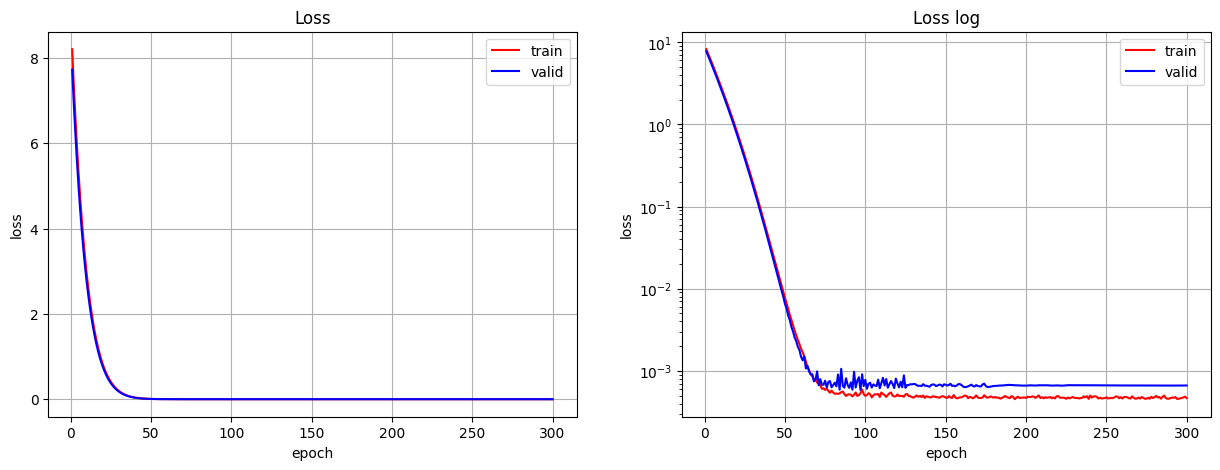

In [8]:
model_cnn = Sequential((
    Conv1D(32, 3, input_shape=x_train.shape[1:]),
    Flatten(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=L2(0.3)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_cnn, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model with GRU

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         5,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,843 (26.73 KB)

 Trainable params: 6,843 (26.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.0140 - val_loss: 1.9256 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8953 - val_loss: 1.8108 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7820 - val_loss: 1.7016 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6742 - val_loss: 1.5981 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5725 - val_loss: 1.5004 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4762 - val_loss: 1.4082 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3854 - val_loss: 1.3214 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2999 - val_loss: 1.2396 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2195 - val_loss: 1.1627 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

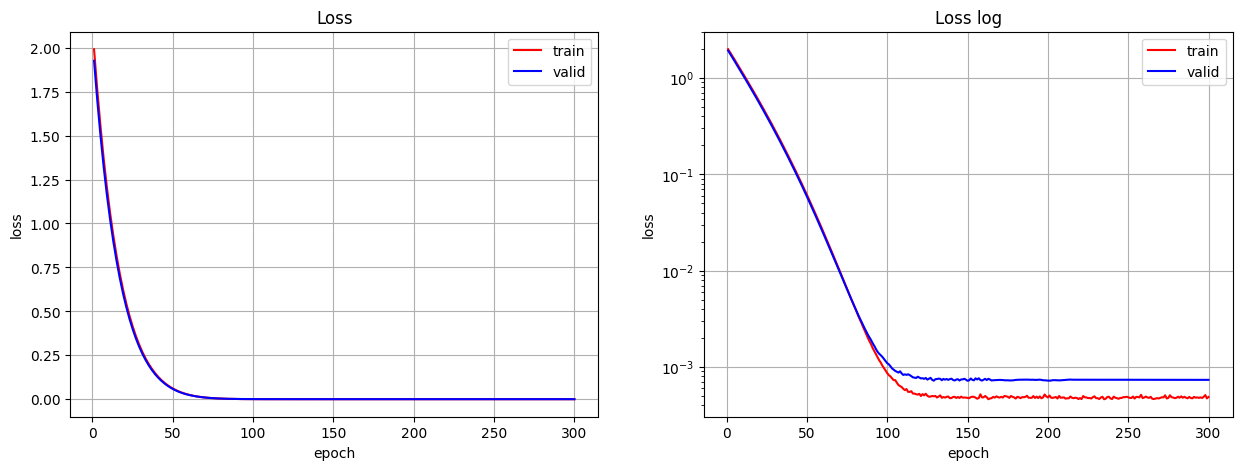

In [9]:
dropout = 0.1

model_gru = Sequential((
    GRU(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_gru, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model with LSTM

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,667 (33.86 KB)

 Trainable params: 8,667 (33.86 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.1519 - val_loss: 2.0574 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0257 - val_loss: 1.9351 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9049 - val_loss: 1.8187 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7904 - val_loss: 1.7081 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6812 - val_loss: 1.6032 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5778 - val_loss: 1.5039 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.4801 - val_loss: 1.4098 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3874 - val_loss: 1.3208 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3001 - val_loss: 1.2369 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

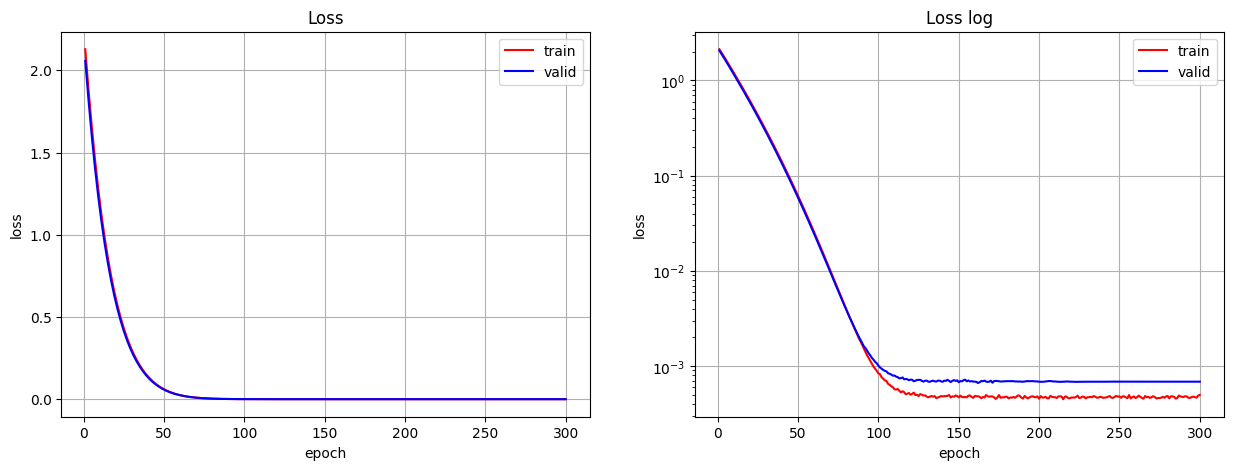

In [10]:
dropout = 0.1

model_lstm = Sequential((
    LSTM(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_lstm, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model Bidireccional

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 6, 32)          │         4,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,867 (30.73 KB)

 Trainable params: 7,867 (30.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 2.9089 - val_loss: 2.6458 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5645 - val_loss: 2.3260 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2526 - val_loss: 2.0380 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9716 - val_loss: 1.7805 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7213 - val_loss: 1.5518 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4993 - val_loss: 1.3495 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3027 - val_loss: 1.1712 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1300 - val_loss: 1.0145 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9782 - val_loss: 0.8769 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

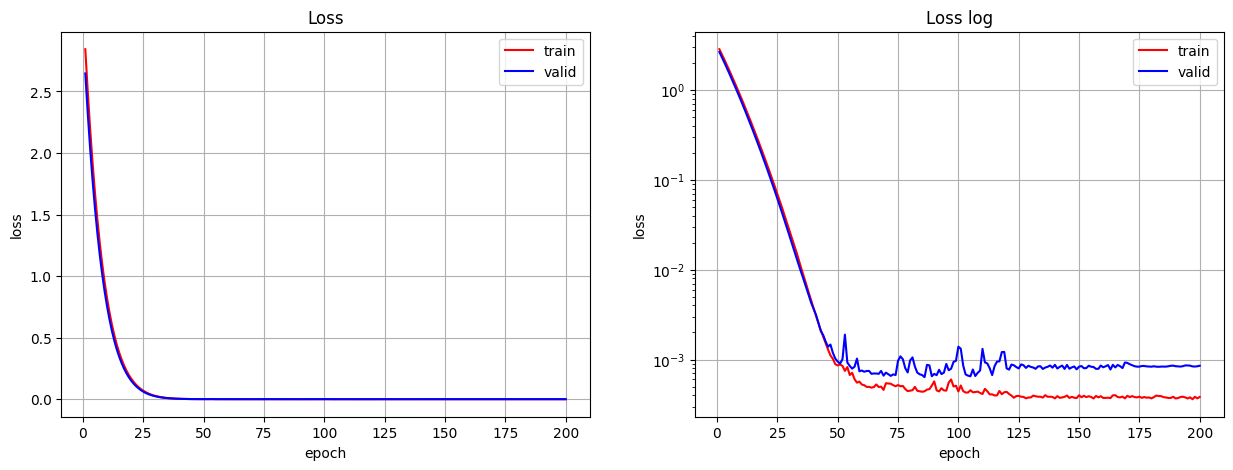

In [11]:
forward_layer = GRU(16, return_sequences=True)
backward_layer = GRU(16, activation='relu',
                     return_sequences=True,
                     go_backwards=True)

model_bidirectional = Sequential((
    Bidirectional(layer=forward_layer,
                  backward_layer=backward_layer,
                  input_shape=x_train.shape[1:]),
    Flatten(),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_bidirectional, 
                         x_train, y_train,
                         x_val, y_val, x_test, y_test)

## Backtesting

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002D308D09E40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


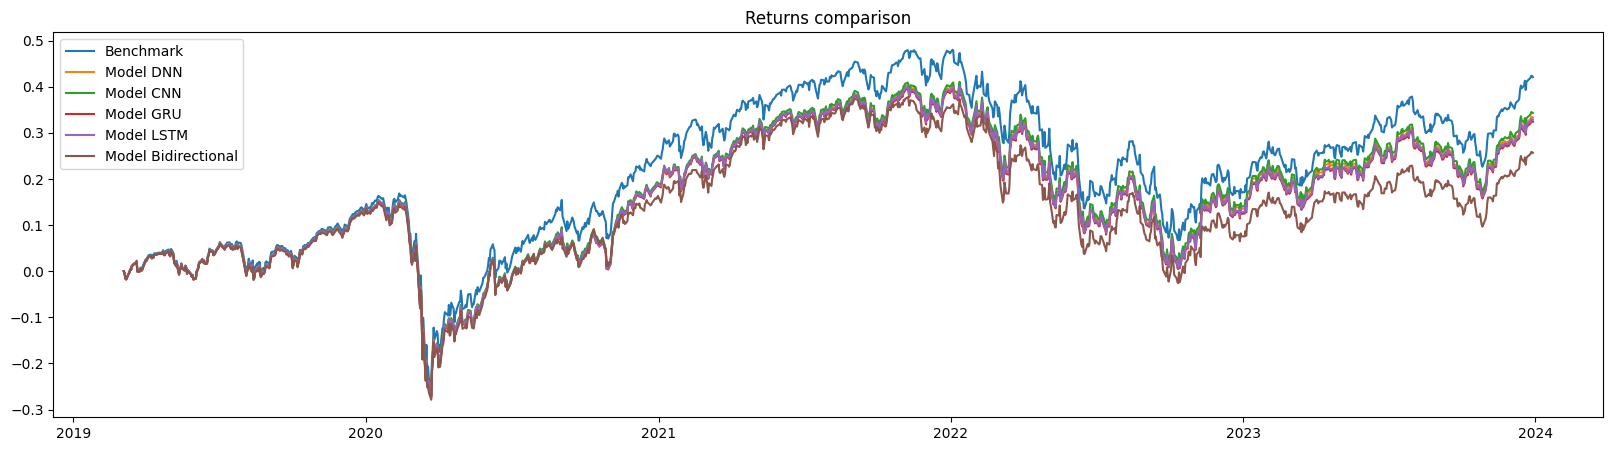

,Annual Returns,Annual Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown,Max Time Under Water,Calmar Ratio,Information Ratio
Benchmark,0.076754,0.203326,0.377494,0.442047,-0.354829,500.0,0.216313,0
Model DNN,0.061501,0.201114,0.305804,0.353532,-0.36825,493.0,0.16701,-0.575887
Model CNN,0.063115,0.201566,0.313124,0.362822,-0.368696,493.0,0.171185,-0.511963
Model GRU,0.059984,0.201869,0.297145,0.34354,-0.369752,493.0,0.162228,-0.606041
Model LSTM,0.060671,0.201904,0.300495,0.347378,-0.36965,493.0,0.164131,-0.585349
Model Bidirectional,0.048571,0.204038,0.238047,0.276257,-0.372349,538.0,0.130443,-0.797424


In [12]:
from helper_functions import run_full_backtesting

models = {
    'Model DNN': model_dnn,
    'Model CNN': model_cnn,
    'Model GRU': model_gru,
    'Model LSTM': model_lstm,
    'Model Bidirectional': model_bidirectional
}

df_results = run_full_backtesting(data_provider, x_test, models)
df_results